In [ ]:
Basic code to import and visualize Bedmap2 ice surface and bed elevation topography dataset

Author: W. Sauthoff (sauthoff@mines.edu)

In [22]:
# import packages
import xarray
# import matplotlib.pyplot as plt
# import numpy as np

# define data directory 
# (replace with your data directory file path)
data_dir = '/Volumes/ExtremeSSD/data/'

In [23]:
# download Bedmap2 files from: 
# https://www.bas.ac.uk/project/bedmap-2/#data
# relocate download to data_dir

In [88]:
# open bed into an xarray.DataArray
Bedmap2_da = xr.open_rasterio(data_dir + 'beds/Bedmap2/bedmap2_tiff/bedmap2_bed.tif')

# covert our xarray.DataArray into a xarray.Dataset
Bedmap2_bed = Bedmap2_da.to_dataset('band')

# rename the data variable to a more useful name
Bedmap2_bed = Bedmap2_bed.rename({1: 'bed'})

# repeat for surface and thickness
Bedmap2_surf = xr.open_rasterio(data_dir + 'beds/Bedmap2/bedmap2_tiff/bedmap2_surface.tif').to_dataset('band')
Bedmap2_surf = Bedmap2_surf.rename({1: 'surface'})
Bedmap2_thickness = xr.open_rasterio(data_dir + 'beds/Bedmap2/bedmap2_tiff/bedmap2_thickness.tif').to_dataset('band')
Bedmap2_thickness = Bedmap2_thickness.rename({1: 'thickness'})

# merge xarray.Datasets and inspect merged xarray.Dataset
Bedmap2_ds = xarray.merge([Bedmap2_bed, Bedmap2_surf, Bedmap2_thickness])
Bedmap2_ds

/var/folders/tn/2b7yqbx51jxb820_x39chyc80000gn/T/ipykernel_13989/2181991127.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  Bedmap2_da = xr.open_rasterio(data_dir + 'beds/Bedmap2/bedmap2_tiff/bedmap2_bed.tif')
/var/folders/tn/2b7yqbx51jxb820_x39chyc80000gn/T/ipykernel_13989/2181991127.py:11: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  Bedmap2_surf = xr.open_rasterio(data_dir + 'beds/Bedmap2/bedmap2_tiff/bedmap2_surface.tif').to_dataset('band')
/var/folders/tn/2b7yqbx51jxb820_x39chyc80000gn/T/ipykernel_13989/2181991127.py:13: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_s

<xarray.Dataset>
Dimensions:    (y: 6667, x: 6667)
Coordinates:
  * y          (y) float64 3.333e+06 3.332e+06 ... -3.332e+06 -3.333e+06
  * x          (x) float64 -3.333e+06 -3.332e+06 ... 3.332e+06 3.333e+06
Data variables:
    bed        (y, x) int16 ...
    surface    (y, x) int16 ...
    thickness  (y, x) int16 ...
Attributes:
    transform:      (1000.0, 0.0, -3333500.0, 0.0, -1000.0, 3333500.0)
    crs:            +init=epsg:3031
    res:            (1000.0, 1000.0)
    is_tiled:       1
    nodatavals:     (32767.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

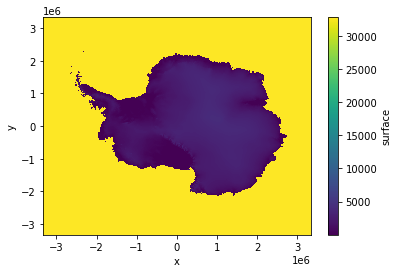

In [91]:
# plot to verify data loaded properly
Bedmap2_ds.surface.plot()

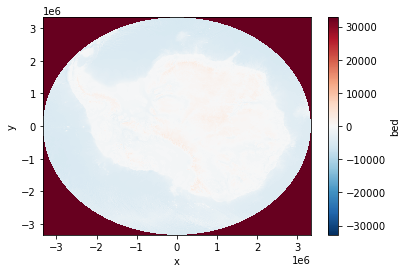

In [92]:
# plot bed (fill values in Southern Ocean wash out bed topography)
Bedmap2_ds.bed.plot()

In [93]:
# calculate hydropotential (following Fricker and others, 2014 eqn. 1, which follows Shreve 1972)
# hydropotential = Zb + (rho-ice/rho-water)*Zsurf
# assign as new xarray.Dataset variable
# inspect xarray.Dataset
Bedmap2_ds = Bedmap2_ds.assign(hydropotential_MPa=Bedmap2_ds['bed'] + (917/1000)*Bedmap2_ds['surface'])
Bedmap2_ds

<xarray.Dataset>
Dimensions:             (y: 6667, x: 6667)
Coordinates:
  * y                   (y) float64 3.333e+06 3.332e+06 ... -3.333e+06
  * x                   (x) float64 -3.333e+06 -3.332e+06 ... 3.333e+06
Data variables:
    bed                 (y, x) int16 ...
    surface             (y, x) int16 32767 32767 32767 ... 32767 32767 32767
    thickness           (y, x) int16 ...
    hydropotential_MPa  (y, x) float64 6.281e+04 6.281e+04 ... 6.281e+04
Attributes:
    transform:      (1000.0, 0.0, -3333500.0, 0.0, -1000.0, 3333500.0)
    crs:            +init=epsg:3031
    res:            (1000.0, 1000.0)
    is_tiled:       1
    nodatavals:     (32767.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

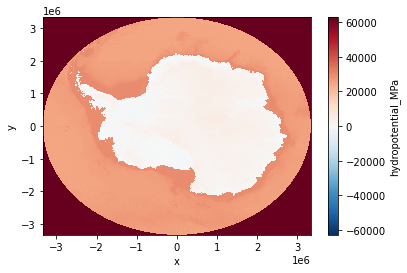

In [96]:
# plot hydropotential (fill values in Southern Ocean wash out hydropotential)
Bedmap2_ds.hydropotential_MPa.plot()